# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [61]:
# Import numpy and pandas
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tools import eval_measures

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [6]:
# Run this code:
sensor = pd.read_csv('/Users/user/lab-time-series/sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [7]:
# Your code here:
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [9]:
# Your code here:

sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [11]:
# Your code here:
sensor.shape
#filas,columnas


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [13]:
# Your code here:
#El rango de tiempo que yo determino se divide entre el numero de periodos que yo determino,
#en este caso 1751

indice_tiempo = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=1751)
indice_tiempo

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [16]:
# Your code here:
#aqui agregamos como indice a la tabla de sensor la serie de tiempo que creamos 
sensor = sensor.set_index(indice_tiempo)
sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

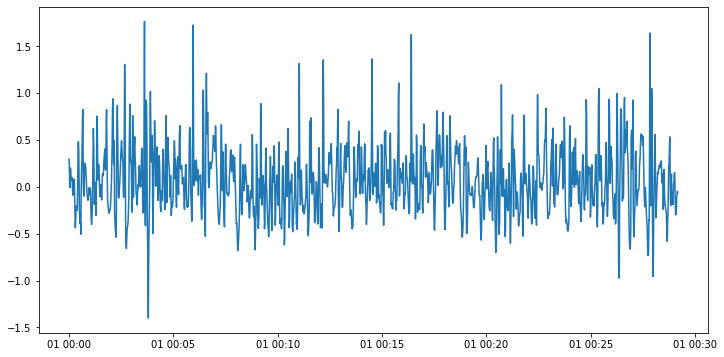

In [35]:
#la decision de que sea un modelo aditivo es por esto, por que es lineal y no forma un cono
#es decir donde vemos que las lineas van formando la figura de un cono

plt.plot(sensor.index, sensor['userAcceleration.x'])

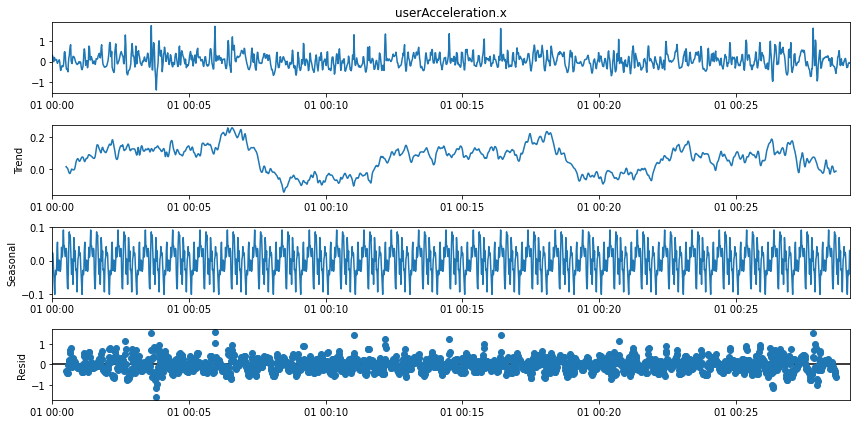

In [26]:
# Your code here:

#Normalmente usamos multiplicativo cuando la magnitud de la tendencia
#de temporalidad depende de la magnitud de tus datos.
#En caso contrario, usamos el aditivo, donde la magnitud de tu temporalidad
#no cambia en relacion con el tiempo, en este caso se decidió usar el modelo aditivo
#http://www.ub.edu/aplica_infor/spss/cap8-2.htm  consulta


#Tamaño d graf
plt.rcParams['figure.figsize'] = 12,6
decomposition = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'], model = 'additive', period = 60)

#Esto grafica las series del objeto
decomposition.plot();


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

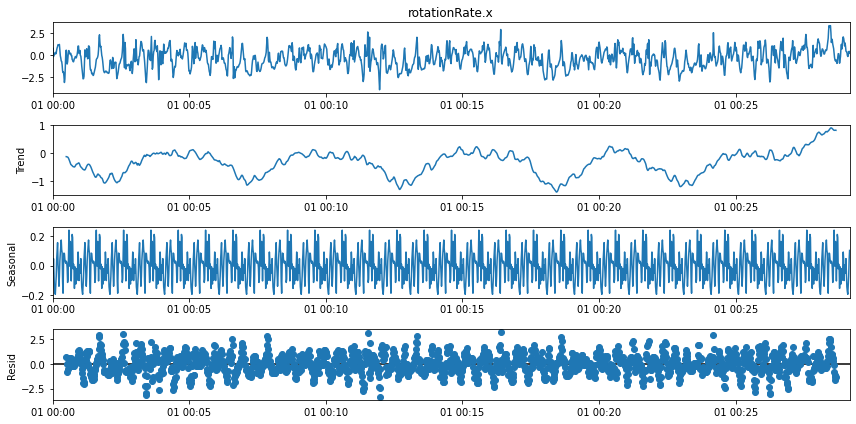

In [37]:
plt.rcParams['figure.figsize'] = 12,6
decomposition = sm.tsa.seasonal_decompose(sensor['rotationRate.x'], model = 'additive', period = 60)

#Esto grafica las series del objeto
decomposition.plot();

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

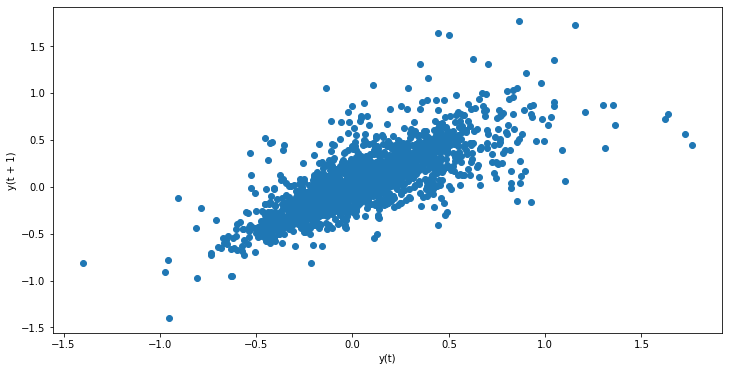

In [31]:
# Your code here:
lag_plot(sensor['userAcceleration.x']);


Create a lag plot for `rotationRate.x`

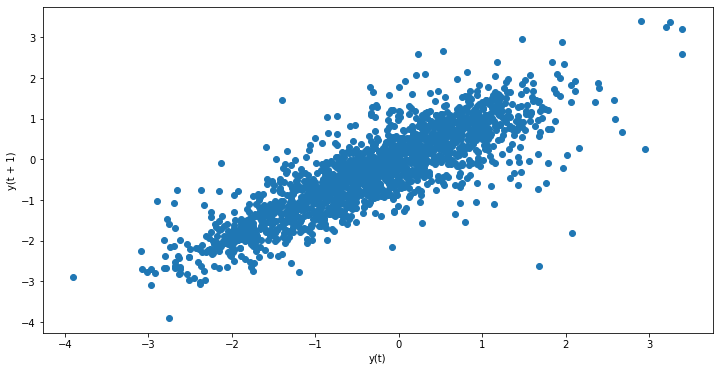

In [32]:
# Your code here:

lag_plot(sensor['rotationRate.x']);

What are your conclusions from both visualizations?

In [38]:
# Your conclusions here:

# es una serie ordenada, comprende los valores de mayor a menor
#y se pueden ver los outlayers, donde se representa como una sucesion casi lineal, donde
#"userAcceleration.x" tiene más datos dispersos

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [39]:
# Your code here:
decomposition.seasonal['2018':]

2018-01-01 00:00:00    0.003143
2018-01-01 00:00:01   -0.050363
2018-01-01 00:00:02    0.046711
2018-01-01 00:00:03   -0.039732
2018-01-01 00:00:04   -0.144469
                         ...   
2018-01-01 00:29:06   -0.194779
2018-01-01 00:29:07   -0.126542
2018-01-01 00:29:08   -0.073032
2018-01-01 00:29:09    0.040205
2018-01-01 00:29:10    0.102061
Name: seasonal, Length: 1751, dtype: float64

In [41]:
#Prueba estadistica de ADFUller
#básicamente nos dice si nuestros datos son estacionarios
#H_0 es que neustros datos no son estacionarios
#H_1 es que si son estacionarios
from statsmodels.tsa.stattools import adfuller
#Autolag impide que adfuller selecciona un lag automaticamente
sensor_ad = adfuller(sensor['userAcceleration.x'],autolag=None)

In [45]:
sensor_ad
#Nuesta prueda estadistica nos da el resultado de ADfuller
#Cuanto más negativa sea, es más probable que rechacemos h_0
#Vemos que el valor es -16, por ende podemos decir que los datos son 
#estacionarios con 99% de confianza (teniendo en cuenta el nivel de significancia)
#que nos dio nuestra prueba, el cual es menor a 0.05, por lo tanto rechamos la hipotesis nula
print(f'Prueba estadistica {sensor_ad[0]}')
print(f'P-value  {sensor_ad[1]}')
for k, v in sensor_ad[4].items():
    print('\t{}:{} Los datos son {} estacionarios con {}% de confianza'.format(k, v, "not" if v < sensor_ad[0] else "", 100-int(k[:-1])))

Prueba estadistica -8.16009502683592
P-value  9.193147705719386e-13
	1%:-3.4341465551936534 Los datos son  estacionarios con 99% de confianza
	5%:-2.863216966926812 Los datos son  estacionarios con 95% de confianza
	10%:-2.567662770090317 Los datos son  estacionarios con 90% de confianza


In [46]:
sensor_ad_rota = adfuller(sensor['rotationRate.x'],autolag=None)
sensor_ad_rota
print(f'Prueba estadistica {sensor_ad_rota[0]}')
print(f'P-value  {sensor_ad_rota[1]}')
for k, v in sensor_ad_rota[4].items():
    print('\t{}:{} Los datos son {} estacionarios con {}% de confianza'.format(k, v, "not" if v < sensor_ad_rota[0] else "", 100-int(k[:-1])))


Prueba estadistica -5.26986062508642
P-value  6.320230335912249e-06
	1%:-3.4341465551936534 Los datos son  estacionarios con 99% de confianza
	5%:-2.863216966926812 Los datos son  estacionarios con 95% de confianza
	10%:-2.567662770090317 Los datos son  estacionarios con 90% de confianza


What are your conclusions from this test?

In [47]:
# Your conclusions here:
# Ambas variables tienen un p- value menor al alpha, por lo tanto
#ambos modelos rechazan la hipotesis nula y concluimos que son stacionarias


Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [53]:
# Your code here:
sensor['userAcceleration.x']

2018-01-01 00:00:00    0.294894
2018-01-01 00:00:01    0.219405
2018-01-01 00:00:02    0.010714
2018-01-01 00:00:03   -0.008389
2018-01-01 00:00:04    0.199441
                         ...   
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Name: userAcceleration.x, Length: 1751, dtype: float64

In [50]:
# Separamos la data
test_set = sensor['userAcceleration.x'][-10:]
traint = sensor['userAcceleration.x'][:-10]

In [51]:
test_set

2018-01-01 00:29:01    0.149749
2018-01-01 00:29:02    0.038461
2018-01-01 00:29:03   -0.169175
2018-01-01 00:29:04   -0.300361
2018-01-01 00:29:05   -0.270174
2018-01-01 00:29:06   -0.268367
2018-01-01 00:29:07   -0.102444
2018-01-01 00:29:08   -0.085590
2018-01-01 00:29:09   -0.048105
2018-01-01 00:29:10   -0.065011
Name: userAcceleration.x, dtype: float64

In [52]:
traint

2018-01-01 00:00:00    0.294894
2018-01-01 00:00:01    0.219405
2018-01-01 00:00:02    0.010714
2018-01-01 00:00:03   -0.008389
2018-01-01 00:00:04    0.199441
                         ...   
2018-01-01 00:28:56   -0.191617
2018-01-01 00:28:57   -0.081173
2018-01-01 00:28:58    0.033395
2018-01-01 00:28:59    0.028120
2018-01-01 00:29:00    0.140211
Name: userAcceleration.x, Length: 1741, dtype: float64

In [65]:

model = ARMA(traint, order=(2, 1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(test_set.index[0],test_set.index[-1])

results = pd.DataFrame({'Test':test_set, 'Predictions':predictions})

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency S will be use

In [72]:
predictions 

2018-01-01 00:29:01    0.173149
2018-01-01 00:29:02    0.142896
2018-01-01 00:29:03    0.100522
2018-01-01 00:29:04    0.070106
2018-01-01 00:29:05    0.056099
2018-01-01 00:29:06    0.053778
2018-01-01 00:29:07    0.056790
2018-01-01 00:29:08    0.060646
2018-01-01 00:29:09    0.063316
2018-01-01 00:29:10    0.064493
Freq: S, dtype: float64

In [73]:
results

,Test,Predictions
2018-01-01 00:29:01,0.149749,0.173149
2018-01-01 00:29:02,0.038461,0.142896
2018-01-01 00:29:03,-0.169175,0.100522
2018-01-01 00:29:04,-0.300361,0.070106
2018-01-01 00:29:05,-0.270174,0.056099
2018-01-01 00:29:06,-0.268367,0.053778
2018-01-01 00:29:07,-0.102444,0.056790
2018-01-01 00:29:08,-0.085590,0.060646
2018-01-01 00:29:09,-0.048105,0.063316
2018-01-01 00:29:10,-0.065011,0.064493


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [67]:
# Your code here:
rmse = eval_measures.rmse(results.Test, results.Predictions)
rmse

0.22529863850035978